In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('car-accidents.csv', nrows=500000)

C:\Users\jason\AppData\Local\Temp\ipykernel_9696\3442920277.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2/20/2024,18:25,MANHATTAN,10019.0,40.765250,-73.995094,"(40.76525, -73.995094)",WEST 49 STREET,11 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4704029,Sedan,NaN,NaN,NaN,NaN
1,2/20/2024,13:15,NaN,NaN,40.679787,-73.938440,"(40.679787, -73.93844)",FULTON STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4704115,Sedan,NaN,NaN,NaN,NaN
2,2/20/2024,9:15,QUEENS,11106.0,40.759422,-73.927470,"(40.759422, -73.92747)",NaN,NaN,34-02 31 STREET,...,NaN,NaN,NaN,NaN,4704050,Pick-up Truck,NaN,NaN,NaN,NaN
3,2/20/2024,19:00,BRONX,10463.0,40.873917,-73.909260,"(40.873917, -73.90926)",NaN,NaN,54 WEST 225 STREET,...,Unspecified,NaN,NaN,NaN,4704256,Sedan,NaN,NaN,NaN,NaN
4,2/20/2024,19:30,NaN,NaN,NaN,NaN,NaN,HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4704085,Box Truck,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     500000 non-null  object 
 1   CRASH TIME                     500000 non-null  object 
 2   BOROUGH                        326039 non-null  object 
 3   ZIP CODE                       325964 non-null  float64
 4   LATITUDE                       458926 non-null  float64
 5   LONGITUDE                      458926 non-null  float64
 6   LOCATION                       458926 non-null  object 
 7   ON STREET NAME                 371559 non-null  object 
 8   CROSS STREET NAME              238533 non-null  object 
 9   OFF STREET NAME                128413 non-null  object 
 10  NUMBER OF PERSONS INJURED      499999 non-null  float64
 11  NUMBER OF PERSONS KILLED       500000 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED 

In [4]:
data.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          173961
ZIP CODE                         174036
LATITUDE                          41074
LONGITUDE                         41074
LOCATION                          41074
ON STREET NAME                   128441
CROSS STREET NAME                261467
OFF STREET NAME                  371587
NUMBER OF PERSONS INJURED             1
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      2136
CONTRIBUTING FACTOR VEHICLE 2     98098
CONTRIBUTING FACTOR VEHICLE 3    457305
CONTRIBUTING FACTOR VEHICLE 4    489219
CONTRIBUTING FACTOR VEHICLE 5    496871
COLLISION_ID                          0
VEHICLE TYPE CODE 1                4591


In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,325964.000000,458926.000000,458926.000000,499999.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05
mean,10892.806264,40.481492,-73.469970,0.381771,0.001948,0.060030,0.000858,0.037618,0.000178,0.276588,0.000860,4.311369e+06
std,528.224943,3.147564,5.711266,0.744994,0.046262,0.249115,0.029483,0.193554,0.013340,0.710974,0.032113,1.446522e+05
min,10000.000000,0.000000,-74.254845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.828540e+06
25%,10457.000000,40.667114,-73.962906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.186271e+06
50%,11208.000000,40.717648,-73.919220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.311422e+06
75%,11249.000000,40.780290,-73.863060,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.436465e+06
max,11697.000000,40.912884,0.000000,40.000000,4.000000,7.000000,2.000000,3.000000,1.000000,40.000000,4.000000,4.704339e+06


In [7]:
data.shape

(500000, 29)

In [8]:
data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [9]:
# Changing column names to the ones I want to use

new_cols_dict = {
  'CRASH DATE' : 'crash_date',
  'CRASH TIME' : 'crash_time',
  'BOROUGH' : 'borough',
  'ZIP CODE' : 'zip_code',
  'LATITUDE' : 'latitude',
  'LONGITUDE' : 'longitude',
  'LOCATION' : 'location',
  'ON STREET NAME' : 'on_street_name',
  'CROSS STREET NAME' : 'cross_street_name',
  'OFF STREET NAME' : 'off_street_name',
  'NUMBER OF PERSONS INJURED' : 'persons_injured',
  'NUMBER OF PERSONS KILLED' : 'persons_killed',
  'NUMBER OF PEDESTRIANS INJURED' : 'pedestrians_injured',
  'NUMBER OF PEDESTRIANS KILLED' : 'pedestrians_killed',
  'NUMBER OF CYCLIST INJURED' : 'cyclist_injured',
  'NUMBER OF CYCLIST KILLED' : 'cyclist_killed',
  'NUMBER OF MOTORIST INJURED' : 'motorist_injured',
  'NUMBER OF MOTORIST KILLED' : 'motorist_killed',
  'CONTRIBUTING FACTOR VEHICLE 1' : 'contributing_factor_vehicle_1',
  'CONTRIBUTING FACTOR VEHICLE 2' : 'contributing_factor_vehicle_2',
  'CONTRIBUTING FACTOR VEHICLE 3' : 'contributing_factor_vehicle_3',
  'CONTRIBUTING FACTOR VEHICLE 4' : 'contributing_factor_vehicle_4',
  'CONTRIBUTING FACTOR VEHICLE 5' : 'contributing_factor_vehicle_5',
  'COLLISION_ID' : 'collision_id',
  'VEHICLE TYPE CODE 1' : 'vehicle_type_code_1',
  'VEHICLE TYPE CODE 2' : 'vehicle_type_code_2',
  'VEHICLE TYPE CODE 3' : 'vehicle_type_code_3',
  'VEHICLE TYPE CODE 4' : 'vehicle_type_code_4',
  'VEHICLE TYPE CODE 5' : 'vehicle_type_code_5'
}

data.rename(new_cols_dict, axis=1, inplace=True)


In [10]:
data.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'persons_injured', 'persons_killed',
       'pedestrians_injured', 'pedestrians_killed', 'cyclist_injured',
       'cyclist_killed', 'motorist_injured', 'motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4',
       'contributing_factor_vehicle_5', 'collision_id', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'vehicle_type_code_3', 'vehicle_type_code_4',
       'vehicle_type_code_5'],
      dtype='object')

In [11]:
# dropping unwanted columns for data exploration

columns_to_drop = [
  'on_street_name',
  'off_street_name',
  'cross_street_name', 
  'contributing_factor_vehicle_2',
  'contributing_factor_vehicle_3', 
  'contributing_factor_vehicle_4', 
  'contributing_factor_vehicle_5', 
  'vehicle_type_code_3', 
  'vehicle_type_code_4', 
  'vehicle_type_code_5', 
  'location'
  ]

data.drop(columns=columns_to_drop, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     500000 non-null  object 
 1   crash_time                     500000 non-null  object 
 2   borough                        326039 non-null  object 
 3   zip_code                       325964 non-null  float64
 4   latitude                       458926 non-null  float64
 5   longitude                      458926 non-null  float64
 6   persons_injured                499999 non-null  float64
 7   persons_killed                 500000 non-null  int64  
 8   pedestrians_injured            500000 non-null  int64  
 9   pedestrians_killed             500000 non-null  int64  
 10  cyclist_injured                500000 non-null  int64  
 11  cyclist_killed                 500000 non-null  int64  
 12  motorist_injured              

In [13]:
# Changing necessary column objects to numeric/date values

data['crash_date'] = pd.to_datetime(data['crash_date'])
data['zip_code'] = pd.to_numeric(data['zip_code'], errors='coerce')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     500000 non-null  datetime64[ns]
 1   crash_time                     500000 non-null  object        
 2   borough                        326039 non-null  object        
 3   zip_code                       325964 non-null  float64       
 4   latitude                       458926 non-null  float64       
 5   longitude                      458926 non-null  float64       
 6   persons_injured                499999 non-null  float64       
 7   persons_killed                 500000 non-null  int64         
 8   pedestrians_injured            500000 non-null  int64         
 9   pedestrians_killed             500000 non-null  int64         
 10  cyclist_injured                500000 non-null  int64         
 11  

In [15]:
data.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code_1,vehicle_type_code_2
0,2024-02-20,18:25,MANHATTAN,10019.0,40.765250,-73.995094,1.0,0,1,0,0,0,0,0,NaN,4704029,Sedan,NaN
1,2024-02-20,13:15,NaN,NaN,40.679787,-73.938440,1.0,0,0,0,0,0,1,0,Passing Too Closely,4704115,Sedan,NaN
2,2024-02-20,9:15,QUEENS,11106.0,40.759422,-73.927470,0.0,0,0,0,0,0,0,0,Backing Unsafely,4704050,Pick-up Truck,NaN
3,2024-02-20,19:00,BRONX,10463.0,40.873917,-73.909260,0.0,0,0,0,0,0,0,0,Unspecified,4704256,Sedan,NaN
4,2024-02-20,19:30,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4704085,Box Truck,NaN


In [16]:
data.isnull().sum()

crash_date                            0
crash_time                            0
borough                          173961
zip_code                         174036
latitude                          41074
longitude                         41074
persons_injured                       1
persons_killed                        0
pedestrians_injured                   0
pedestrians_killed                    0
cyclist_injured                       0
cyclist_killed                        0
motorist_injured                      0
motorist_killed                       0
contributing_factor_vehicle_1      2136
collision_id                          0
vehicle_type_code_1                4591
vehicle_type_code_2              137753
dtype: int64

What is the average percentage of a person getting injured in a car accident?

In [17]:
data.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'persons_injured', 'persons_killed', 'pedestrians_injured',
       'pedestrians_killed', 'cyclist_injured', 'cyclist_killed',
       'motorist_injured', 'motorist_killed', 'contributing_factor_vehicle_1',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2'],
      dtype='object')

In [18]:
total_persons_injured = data['persons_injured'].sum()
total_pedestrians_injured = data['pedestrians_injured'].sum()
total_cyclist_injured = data['cyclist_injured'].sum()
total_motorist_injured = data['motorist_injured'].sum()
total_persons = data['persons_injured'].count()

injured_percentages = np.array([
    (total_persons_injured / total_persons) * 100,   # average percentage of persons' injury
    (total_pedestrians_injured / total_persons) * 100,   # average percentage of pedestrians' injury
    (total_cyclist_injured / total_persons) * 100,   # average percentage of cyclists' injury
    (total_motorist_injured / total_persons) * 100    # average percentage of motorists' injury
])

print(injured_percentages)
# [persons, pedestrians, cyclists, motorists]


[38.17707635  6.00301201  3.76180752 27.65885532]


What is the average percentage of a person getting killed in a car accident? 

In [19]:
total_persons_killed = data['persons_killed'].sum()
total_pedestrians_killed = data['pedestrians_killed'].sum()
total_cyclist_killed = data['cyclist_killed'].sum()
total_motorist_killed = data['motorist_killed'].sum()
total_persons = data['persons_killed'].count()

death_percentages = np.array([
    (total_persons_killed / total_persons) * 100,   # average percentage of persons killed
    (total_pedestrians_killed / total_persons) * 100,   # average percentage of pedestrians killed
    (total_cyclist_killed / total_persons) * 100,   # average percentage of cyclists killed
    (total_motorist_killed / total_persons) * 100    # average percentage of motorists killed
])

print(death_percentages)
# [persons, pedestrians, cyclists, motorists]

[0.1948 0.0858 0.0178 0.086 ]


Total injured/death percentages

In [20]:
total_injured = total_persons_injured + total_pedestrians_injured + total_cyclist_injured + total_motorist_injured
total_injured_percentage = (total_injured / total_persons) * 100

print("Total Injured Percentage:", total_injured_percentage)

total_deaths = total_persons_killed + total_pedestrians_killed + total_cyclist_killed + total_motorist_killed

total_deaths_percentage = (total_deaths / total_persons) * 100

print("Total Deaths Percentage:", total_deaths_percentage)

# injured/deaths are mutually exclusive

Total Injured Percentage: 75.6006
Total Deaths Percentage: 0.3844


Top 10 Factors for Car Accidents

In [21]:
data.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'persons_injured', 'persons_killed', 'pedestrians_injured',
       'pedestrians_killed', 'cyclist_injured', 'cyclist_killed',
       'motorist_injured', 'motorist_killed', 'contributing_factor_vehicle_1',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2'],
      dtype='object')

In [22]:
data['contributing_factor_vehicle_1'].value_counts()

contributing_factor_vehicle_1
Driver Inattention/Distraction                           126358
Unspecified                                              122093
Following Too Closely                                     38200
Failure to Yield Right-of-Way                             33885
Passing or Lane Usage Improper                            21333
Passing Too Closely                                       19430
Backing Unsafely                                          19003
Other Vehicular                                           14294
Unsafe Lane Changing                                      12900
Unsafe Speed                                              12406
Traffic Control Disregarded                               10895
Turning Improperly                                        10580
Driver Inexperience                                        8545
Reaction to Uninvolved Vehicle                             7472
Alcohol Involvement                                        6596
View Obstr

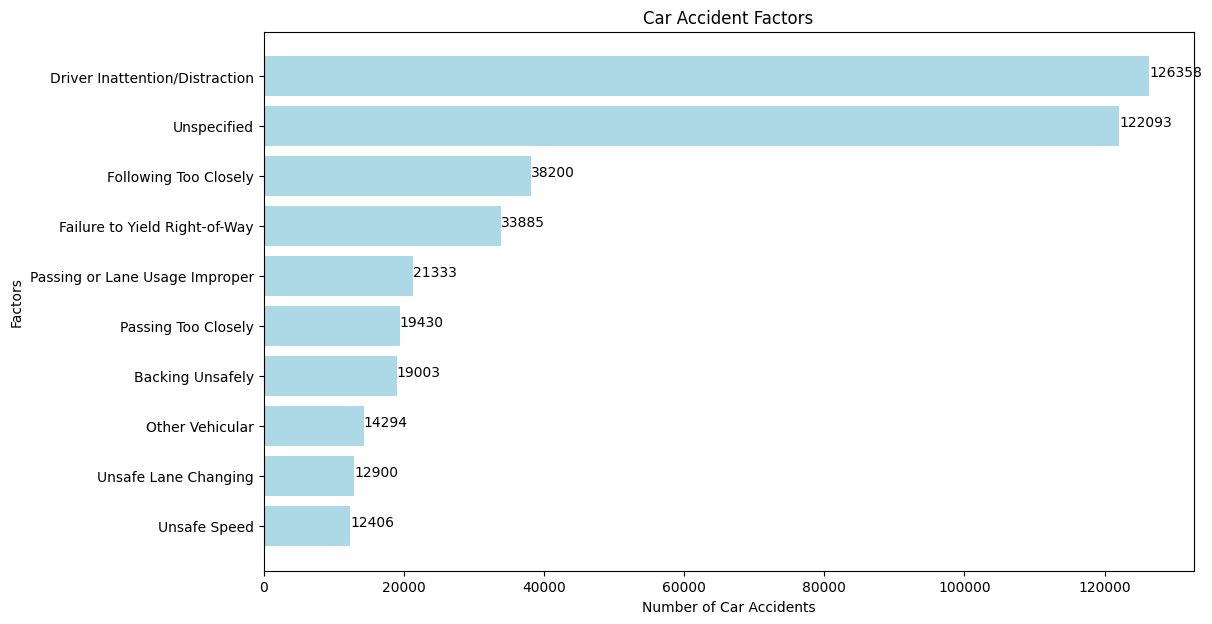

In [23]:
top_factors = data['contributing_factor_vehicle_1'].value_counts().head(10).sort_values()

plt.figure(figsize=(12, 7))

plt.barh(top_factors.index, top_factors.values, color='lightblue')

for index, value in enumerate(top_factors.values):
    plt.text(value, index, str(value))

plt.title('Car Accident Factors')
plt.xlabel('Number of Car Accidents')
plt.ylabel('Factors')


plt.show()

Top 10 Vehicles involved in Car Accidents

In [24]:
data.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'persons_injured', 'persons_killed', 'pedestrians_injured',
       'pedestrians_killed', 'cyclist_injured', 'cyclist_killed',
       'motorist_injured', 'motorist_killed', 'contributing_factor_vehicle_1',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2'],
      dtype='object')

In [25]:
data['vehicle_type_code_1'].value_counts()

vehicle_type_code_1
Sedan                                  230580
Station Wagon/Sport Utility Vehicle    181783
Taxi                                    17922
Pick-up Truck                           12530
Box Truck                                9276
                                        ...  
fdny ambul                                  1
ambulette                                   1
FRHT TRAIL                                  1
E-SKATEBOA                                  1
rv                                          1
Name: count, Length: 912, dtype: int64

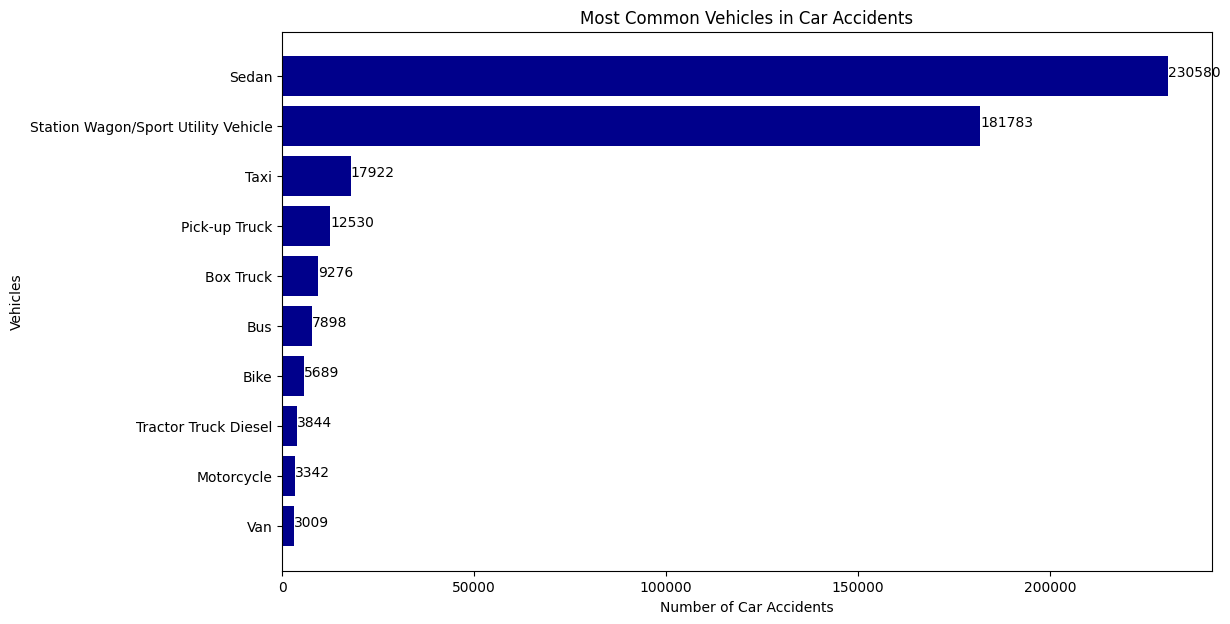

In [26]:
vehicles = data['vehicle_type_code_1'].value_counts().head(10).sort_values()

plt.figure(figsize=(12, 7))

plt.barh(vehicles.index, vehicles.values, color='darkblue')

for index, value in enumerate(vehicles.values):
    plt.text(value, index, str(value))

plt.title('Most Common Vehicles in Car Accidents')
plt.xlabel('Number of Car Accidents')
plt.ylabel('Vehicles')


plt.show()

What times do car accidents most frequently occur?

In [27]:
data['crash_time'] = pd.to_datetime(data['crash_time'], format='%H:%M', errors='coerce')

# Create bins for time categories
bins = [-1, 5, 12, 17, 21, 24]
labels = ['late night (12am-5am)', 'morning (5am-12pm)', 'afternoon (12pm-5pm)', 'evening (5pm-9pm)', 'night (9pm-12am)']

data['crash_time_category'] = pd.cut(data['crash_time'].dt.hour, bins=bins, labels=labels, include_lowest=True)

# Drop unused columns
data = data.drop(['crash_time'], axis=1)

# Revert 'crash_time' back to an object
data['crash_time'] = data['crash_time_category'].astype(str)

In [28]:
# checking for newly added column, crash_time_category exists
data.head()

,crash_date,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code_1,vehicle_type_code_2,crash_time_category,crash_time
0,2024-02-20,MANHATTAN,10019.0,40.765250,-73.995094,1.0,0,1,0,0,0,0,0,NaN,4704029,Sedan,NaN,evening (5pm-9pm),evening (5pm-9pm)
1,2024-02-20,NaN,NaN,40.679787,-73.938440,1.0,0,0,0,0,0,1,0,Passing Too Closely,4704115,Sedan,NaN,afternoon (12pm-5pm),afternoon (12pm-5pm)
2,2024-02-20,QUEENS,11106.0,40.759422,-73.927470,0.0,0,0,0,0,0,0,0,Backing Unsafely,4704050,Pick-up Truck,NaN,morning (5am-12pm),morning (5am-12pm)
3,2024-02-20,BRONX,10463.0,40.873917,-73.909260,0.0,0,0,0,0,0,0,0,Unspecified,4704256,Sedan,NaN,evening (5pm-9pm),evening (5pm-9pm)
4,2024-02-20,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4704085,Box Truck,NaN,evening (5pm-9pm),evening (5pm-9pm)


In [29]:
data['crash_time_category'].value_counts()



crash_time_category
afternoon (12pm-5pm)     159049
morning (5am-12pm)       153827
evening (5pm-9pm)         93864
late night (12am-5am)     60479
night (9pm-12am)          32781
Name: count, dtype: int64

C:\Users\jason\AppData\Local\Temp\ipykernel_9696\3150277657.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crash_time_category_count.index, y=crash_time_category_count.values, palette='deep')


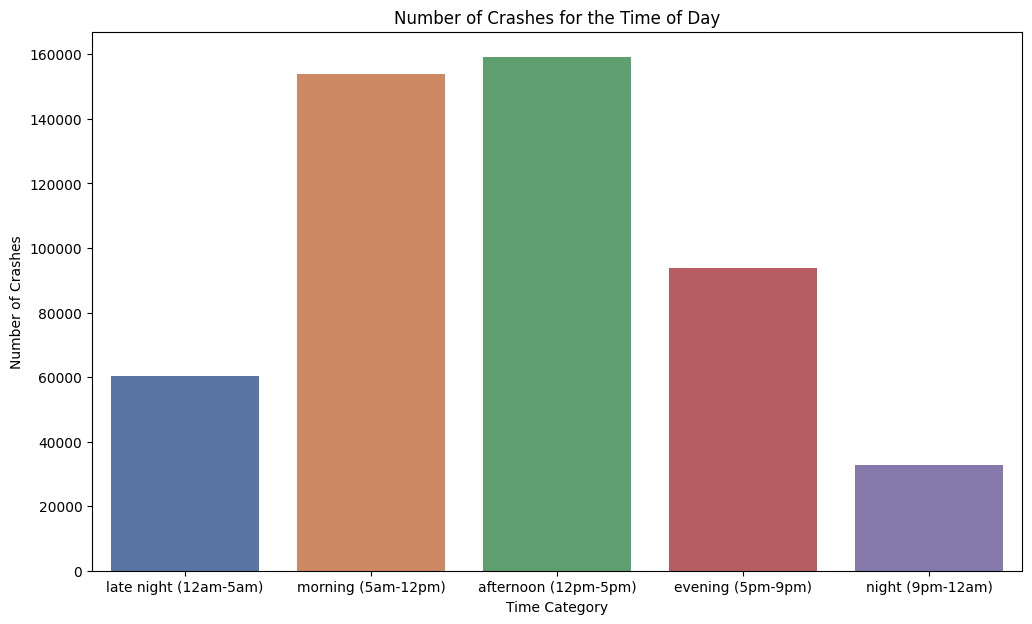

In [30]:
crash_time_category_count = data['crash_time_category'].value_counts()

crash_time_category_count = crash_time_category_count.sort_index()

plt.figure(figsize=(12, 7))
sns.barplot(x=crash_time_category_count.index, y=crash_time_category_count.values, palette='deep')
plt.title('Number of Crashes for the Time of Day')
plt.xlabel('Time Category')
plt.ylabel('Number of Crashes')


plt.show()

Which borough has the most car accidents?

In [31]:
data.columns

Index(['crash_date', 'borough', 'zip_code', 'latitude', 'longitude',
       'persons_injured', 'persons_killed', 'pedestrians_injured',
       'pedestrians_killed', 'cyclist_injured', 'cyclist_killed',
       'motorist_injured', 'motorist_killed', 'contributing_factor_vehicle_1',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'crash_time_category', 'crash_time'],
      dtype='object')

In [32]:
data['borough'].value_counts()

borough
BROOKLYN         109894
QUEENS            91473
BRONX             57992
MANHATTAN         56316
STATEN ISLAND     10364
Name: count, dtype: int64

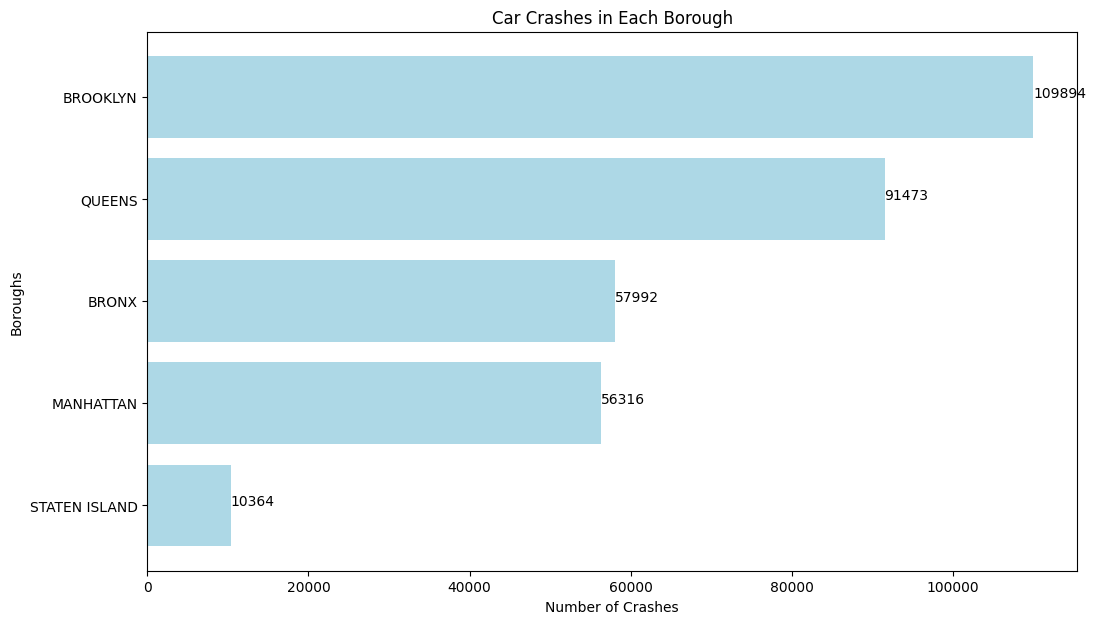

In [33]:
boroughs = data['borough'].value_counts().sort_values()

plt.figure(figsize=(12, 7))

plt.barh(boroughs.index, boroughs.values, color='lightblue')

for index, value in enumerate(boroughs.values):
    plt.text(value, index, str(value))

plt.title('Car Crashes in Each Borough')
plt.xlabel('Number of Crashes')
plt.ylabel('Boroughs')


plt.show()

Which time of year or season has the most car crashes?

In [34]:
# Creating seasons column corresponding to the crash_date

# Seasons of the year
seasons = [
  'Spring', # March to June
  'Summer', # June to September
  'Autumn', # September to December
  'Winter' # December to March
  ]

# Extracting only the month and creating a month column
data['month'] = data['crash_date'].dt.month


season_months = [
  (data['month'] >= 3) & (data['month'] <= 5), # Spring -- March to June
  (data['month'] >= 7) & (data['month'] <= 8), # Summer -- June to September
  (data['month'] >= 9) & (data['month'] <= 11), # Autumn -- September to December
  (data['month'] == 12) | (data['month'] == 1) | (data['month'] == 2), # Winter -- December to March
]

# Adding seasons column using seasons and season_months
data['seasons'] = pd.Categorical(np.select(season_months, seasons, default=''), categories=seasons)

# Deleting unused columns from data
data = data.drop(['month'], axis=1)

In [35]:
# Check if seasons column was added

data.head()

,crash_date,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code_1,vehicle_type_code_2,crash_time_category,crash_time,seasons
0,2024-02-20,MANHATTAN,10019.0,40.765250,-73.995094,1.0,0,1,0,0,0,0,0,NaN,4704029,Sedan,NaN,evening (5pm-9pm),evening (5pm-9pm),Winter
1,2024-02-20,NaN,NaN,40.679787,-73.938440,1.0,0,0,0,0,0,1,0,Passing Too Closely,4704115,Sedan,NaN,afternoon (12pm-5pm),afternoon (12pm-5pm),Winter
2,2024-02-20,QUEENS,11106.0,40.759422,-73.927470,0.0,0,0,0,0,0,0,0,Backing Unsafely,4704050,Pick-up Truck,NaN,morning (5am-12pm),morning (5am-12pm),Winter
3,2024-02-20,BRONX,10463.0,40.873917,-73.909260,0.0,0,0,0,0,0,0,0,Unspecified,4704256,Sedan,NaN,evening (5pm-9pm),evening (5pm-9pm),Winter
4,2024-02-20,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4704085,Box Truck,NaN,evening (5pm-9pm),evening (5pm-9pm),Winter


In [36]:
data['seasons'].value_counts()

seasons
Spring    129669
Winter    120684
Autumn    110648
Summer     91783
Name: count, dtype: int64

C:\Users\jason\AppData\Local\Temp\ipykernel_9696\854676751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='deep')


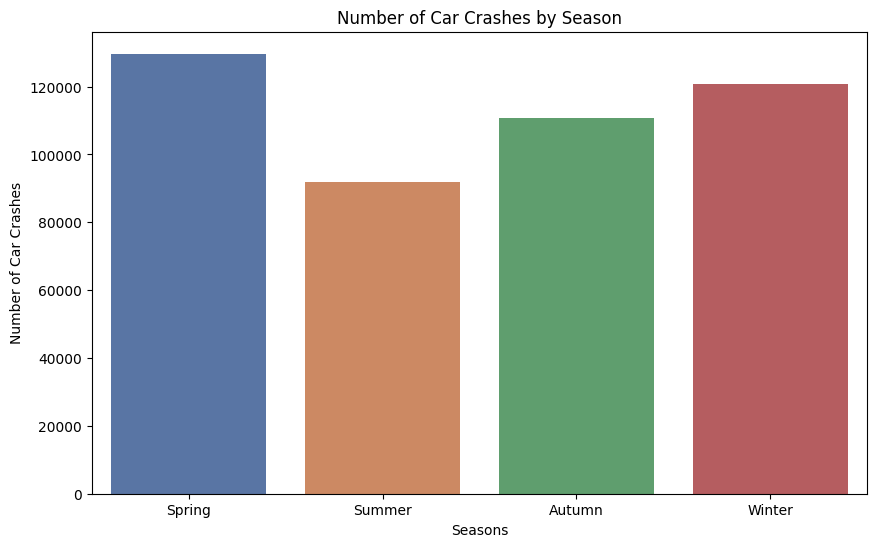

In [37]:
season_counts = data['seasons'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='deep')
plt.title('Number of Car Crashes by Season')
plt.xlabel('Seasons')
plt.ylabel('Number of Car Crashes')
plt.show()

In [38]:
data.to_excel('car-accidents-final.xlsx', sheet_name='Data')